# Shivangi Tripathi

# Mini project - UsedCars Data 

In [258]:
# importing the relevant libraries in the Jupyter notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.stats as stm
import random
import os
%matplotlib inline

In [259]:
dp = pd.read_csv(r'C:\Data_Science\Jigsaw Academy\mini_projects\UsedCarsData.csv', encoding= 'latin1')
dp.head()

Sales_ID                          name  year  selling_price  km_driven  \
0         1        Maruti Swift Dzire VDI  2014         450000     145500   
1         2  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2         3      Honda City 2017-2020 EXi  2006         158000     140000   
3         4     Hyundai i20 Sportz Diesel  2010         225000     127000   
4         5        Maruti Swift VXI BSIII  2007         130000     120000   

    Region     State or Province           City    fuel seller_type  \
0     East  District of Columbia     Washington  Diesel  Individual   
1     East              New York  New York City  Diesel  Individual   
2  Central              Illinois        Chicago  Petrol  Individual   
3  Central              Illinois        Chicago  Diesel  Individual   
4     East              New York  New York City  Petrol  Individual   

  transmission         owner     mileage   engine   max_power  \
0       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats sold  
0            190Nm@ 2000rpm      5    Y  
1       250Nm@ 1500-2500rpm      5    Y  
2     12.7@ 2,700(kgm@ rpm)      5    Y  
3  22.4 kgm at 1750-2750rpm      5    Y  
4     11.5@ 4,500(kgm@ rpm)      5    Y

# Data pre-processing-

In [260]:
dp.shape

(7906, 18)

this data set has 7906 rows and 18 columns

In [261]:
dp.isnull().sum()

Sales_ID             0
name                 0
year                 0
selling_price        0
km_driven            0
Region               0
State or Province    0
City                 0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage              0
engine               0
max_power            0
torque               0
seats                0
sold                 0
dtype: int64

there are no null values in this data set

In [262]:
dp['Sales_ID'].hasnans

False

the column 'Sales_ID' doesn't have any null values as the output as shown below as False

In [263]:
dp.columns

Index(['Sales_ID', 'name', 'year', 'selling_price', 'km_driven', 'Region',
       'State or Province', 'City', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'sold'],
      dtype='object')

these are the columns in our data set

In [264]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sales_ID           7906 non-null   int64 
 1   name               7906 non-null   object
 2   year               7906 non-null   int64 
 3   selling_price      7906 non-null   int64 
 4   km_driven          7906 non-null   int64 
 5   Region             7906 non-null   object
 6   State or Province  7906 non-null   object
 7   City               7906 non-null   object
 8   fuel               7906 non-null   object
 9   seller_type        7906 non-null   object
 10  transmission       7906 non-null   object
 11  owner              7906 non-null   object
 12  mileage            7906 non-null   object
 13  engine             7906 non-null   object
 14  max_power          7906 non-null   object
 15  torque             7906 non-null   object
 16  seats              7906 non-null   int64 


the above method tells us the data type of every column

In [265]:
dp.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7901    False
7902    False
7903    False
7904    False
7905    False
Length: 7906, dtype: bool

In [266]:
dp.duplicated().sum()

0

here in the given dataset there are no duplicate records present hence we do not need to perform the operation for the removal of the duplicate values from the dataset

In [267]:
# dp.drop_duplicates(inplace=True)

In [268]:
dp.head()

Sales_ID                          name  year  selling_price  km_driven  \
0         1        Maruti Swift Dzire VDI  2014         450000     145500   
1         2  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2         3      Honda City 2017-2020 EXi  2006         158000     140000   
3         4     Hyundai i20 Sportz Diesel  2010         225000     127000   
4         5        Maruti Swift VXI BSIII  2007         130000     120000   

    Region     State or Province           City    fuel seller_type  \
0     East  District of Columbia     Washington  Diesel  Individual   
1     East              New York  New York City  Diesel  Individual   
2  Central              Illinois        Chicago  Petrol  Individual   
3  Central              Illinois        Chicago  Diesel  Individual   
4     East              New York  New York City  Petrol  Individual   

  transmission         owner     mileage   engine   max_power  \
0       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats sold  
0            190Nm@ 2000rpm      5    Y  
1       250Nm@ 1500-2500rpm      5    Y  
2     12.7@ 2,700(kgm@ rpm)      5    Y  
3  22.4 kgm at 1750-2750rpm      5    Y  
4     11.5@ 4,500(kgm@ rpm)      5    Y

In [269]:
dp.shape

(7906, 18)

In [270]:
dp['name'].value_counts(dropna=True)

Maruti Swift Dzire VDI                          129
Maruti Alto 800 LXI                              82
Maruti Alto LXi                                  71
BMW X4 M Sport X xDrive20d                       62
Maruti Swift VDI                                 61
                                               ... 
Honda Jazz 1.2 S AT i VTEC                        1
Hyundai i20 Active 1.2 SX with AVN                1
Ambassador CLASSIC 1500 DSL AC                    1
Tata Harrier XZ Dark Edition BSIV                 1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV      1
Name: name, Length: 1982, dtype: int64

In [271]:
dp['name'].value_counts(dropna=True).sum()

7906

here we can see that for the column name 'name' there are 7906 values, which means that there are 7906 names of the car, here 'dropna=True' is used to count the total of the null values also if present (there are no null values as seen above).

In [272]:
dp['name'].unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'], dtype=object)

In [273]:
dp.nunique()

Sales_ID             7906
name                 1982
year                   27
selling_price         670
km_driven             898
Region                  4
State or Province      49
City                 1310
fuel                    4
seller_type             3
transmission            2
owner                   5
mileage               393
engine                121
max_power             320
torque                441
seats                   9
sold                    2
dtype: int64

here we can see that the column 'name' has 1982 unique values

here, nunique is used to count the distinct values present in rows of a respective column (here, the column = 'name')

In [274]:
len(dp['name'].value_counts())

1982

In [275]:
dp['name'].duplicated().any()

True

In [276]:
dp.drop_duplicates(inplace=True)

In [277]:
dp.shape

(7906, 18)

In [278]:
dp['mileage']= dp['mileage'].str.replace('kmpl',"")

In [279]:
dp['mileage'].head(10)

0         23.4 
1        21.14 
2         17.7 
3         23.0 
4         16.1 
5        20.14 
6    17.3 km/kg
7         16.1 
8        23.59 
9         20.0 
Name: mileage, dtype: object

from the above table we can see that there non-numerical values still present in the 'mileage' column

In [280]:
dp['mileage']= dp['mileage'].str.replace('km/kg',"")

In [281]:
dp['mileage'].head(20)

0      23.4 
1     21.14 
2      17.7 
3      23.0 
4      16.1 
5     20.14 
6      17.3 
7      16.1 
8     23.59 
9      20.0 
10    19.01 
11     17.3 
12     19.3 
13     18.9 
14    18.15 
15    24.52 
16     23.0 
17     19.7 
18    22.54 
19     21.0 
Name: mileage, dtype: object

In [282]:
dp['mileage']= dp['mileage'].astype('float')

In [283]:
dp['mileage'].head(20)

0     23.40
1     21.14
2     17.70
3     23.00
4     16.10
5     20.14
6     17.30
7     16.10
8     23.59
9     20.00
10    19.01
11    17.30
12    19.30
13    18.90
14    18.15
15    24.52
16    23.00
17    19.70
18    22.54
19    21.00
Name: mileage, dtype: float64

now all the values in the 'mileage' column are converted into the float data type

In [284]:
dp['engine']= dp['engine'].str.replace('CC',"").astype('float')

In [285]:
dp['engine'].head(7)

0    1248.0
1    1498.0
2    1497.0
3    1396.0
4    1298.0
5    1197.0
6    1061.0
Name: engine, dtype: float64

now all the values in the 'engine' column are converted into the float data type

In [286]:
dp['max_power']= dp['max_power'].str.replace('bhp',"").astype('float')

In [287]:
dp['max_power'].head(10)

0     74.00
1    103.52
2     78.00
3     90.00
4     88.20
5     81.86
6     57.50
7     37.00
8     67.10
9     68.10
Name: max_power, dtype: float64

now all the values in the 'max_power' column are converted into the float data type

In [288]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 7905
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sales_ID           7906 non-null   int64  
 1   name               7906 non-null   object 
 2   year               7906 non-null   int64  
 3   selling_price      7906 non-null   int64  
 4   km_driven          7906 non-null   int64  
 5   Region             7906 non-null   object 
 6   State or Province  7906 non-null   object 
 7   City               7906 non-null   object 
 8   fuel               7906 non-null   object 
 9   seller_type        7906 non-null   object 
 10  transmission       7906 non-null   object 
 11  owner              7906 non-null   object 
 12  mileage            7906 non-null   float64
 13  engine             7906 non-null   float64
 14  max_power          7906 non-null   float64
 15  torque             7906 non-null   object 
 16  seats              7906 

from the above table we can see that the columns- 'mileage', 'max_power', 'engine' are now converted to the float data type which is a numerical data type

In [289]:
dp.head()

Sales_ID                          name  year  selling_price  km_driven  \
0         1        Maruti Swift Dzire VDI  2014         450000     145500   
1         2  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2         3      Honda City 2017-2020 EXi  2006         158000     140000   
3         4     Hyundai i20 Sportz Diesel  2010         225000     127000   
4         5        Maruti Swift VXI BSIII  2007         130000     120000   

    Region     State or Province           City    fuel seller_type  \
0     East  District of Columbia     Washington  Diesel  Individual   
1     East              New York  New York City  Diesel  Individual   
2  Central              Illinois        Chicago  Petrol  Individual   
3  Central              Illinois        Chicago  Diesel  Individual   
4     East              New York  New York City  Petrol  Individual   

  transmission         owner  mileage  engine  max_power  \
0       Manual   First Owner    23.40  1248.0      74.00   
1       Manual  Second Owner    21.14  1498.0     103.52   
2       Manual   Third Owner    17.70  1497.0      78.00   
3       Manual   First Owner    23.00  1396.0      90.00   
4       Manual   First Owner    16.10  1298.0      88.20   

                     torque  seats sold  
0            190Nm@ 2000rpm      5    Y  
1       250Nm@ 1500-2500rpm      5    Y  
2     12.7@ 2,700(kgm@ rpm)      5    Y  
3  22.4 kgm at 1750-2750rpm      5    Y  
4     11.5@ 4,500(kgm@ rpm)      5    Y

In [290]:
dp['present_year'] = 2023

In [291]:
dp.head()

Sales_ID                          name  year  selling_price  km_driven  \
0         1        Maruti Swift Dzire VDI  2014         450000     145500   
1         2  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2         3      Honda City 2017-2020 EXi  2006         158000     140000   
3         4     Hyundai i20 Sportz Diesel  2010         225000     127000   
4         5        Maruti Swift VXI BSIII  2007         130000     120000   

    Region     State or Province           City    fuel seller_type  \
0     East  District of Columbia     Washington  Diesel  Individual   
1     East              New York  New York City  Diesel  Individual   
2  Central              Illinois        Chicago  Petrol  Individual   
3  Central              Illinois        Chicago  Diesel  Individual   
4     East              New York  New York City  Petrol  Individual   

  transmission         owner  mileage  engine  max_power  \
0       Manual   First Owner    23.40  1248.0      74.00   
1       Manual  Second Owner    21.14  1498.0     103.52   
2       Manual   Third Owner    17.70  1497.0      78.00   
3       Manual   First Owner    23.00  1396.0      90.00   
4       Manual   First Owner    16.10  1298.0      88.20   

                     torque  seats sold  present_year  
0            190Nm@ 2000rpm      5    Y          2023  
1       250Nm@ 1500-2500rpm      5    Y          2023  
2     12.7@ 2,700(kgm@ rpm)      5    Y          2023  
3  22.4 kgm at 1750-2750rpm      5    Y          2023  
4     11.5@ 4,500(kgm@ rpm)      5    Y          2023

In [292]:
dp['total_years'] = dp['present_year']-dp['year']
dp.head(7)

Sales_ID                           name  year  selling_price  km_driven  \
0         1         Maruti Swift Dzire VDI  2014         450000     145500   
1         2   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2         3       Honda City 2017-2020 EXi  2006         158000     140000   
3         4      Hyundai i20 Sportz Diesel  2010         225000     127000   
4         5         Maruti Swift VXI BSIII  2007         130000     120000   
5         6  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
6         7   Maruti Wagon R LXI DUO BSIII  2007          96000     175000   

    Region     State or Province           City    fuel seller_type  \
0     East  District of Columbia     Washington  Diesel  Individual   
1     East              New York  New York City  Diesel  Individual   
2  Central              Illinois        Chicago  Petrol  Individual   
3  Central              Illinois        Chicago  Diesel  Individual   
4     East              New York  New York City  Petrol  Individual   
5     East              New York  New York City  Petrol  Individual   
6     West            California    Los Angeles     LPG  Individual   

  transmission         owner  mileage  engine  max_power  \
0       Manual   First Owner    23.40  1248.0      74.00   
1       Manual  Second Owner    21.14  1498.0     103.52   
2       Manual   Third Owner    17.70  1497.0      78.00   
3       Manual   First Owner    23.00  1396.0      90.00   
4       Manual   First Owner    16.10  1298.0      88.20   
5       Manual   First Owner    20.14  1197.0      81.86   
6       Manual   First Owner    17.30  1061.0      57.50   

                     torque  seats sold  present_year  total_years  
0            190Nm@ 2000rpm      5    Y          2023            9  
1       250Nm@ 1500-2500rpm      5    Y          2023            9  
2     12.7@ 2,700(kgm@ rpm)      5    Y          2023           17  
3  22.4 kgm at 1750-2750rpm      5    Y          2023           13  
4     11.5@ 4,500(kgm@ rpm)      5    Y          2023           16  
5         113.75nm@ 4000rpm      5    Y          2023            6  
6      7.8@ 4,500(kgm@ rpm)      5    Y          2023           16

thus we have got the total number of years of the car used based on its name

In [293]:
dp.drop(columns=['Sales_ID'],inplace=True) 
dp.drop(columns=['torque'],inplace=True) 

here we have dropped the columns 'Sales_ID' and 'torque' as these columns are not relevant to us

In [294]:
dp.Region.value_counts()

Central    2376
West       1976
East       1939
South      1615
Name: Region, dtype: int64

hence we can conclude that there are 4 different regions namely- Central, South, East and West and the Central region has 2376 used cars sales, West region has 1976 used cars sales,East region has 1939 used cars sales and the SOuth region has 1615 used cars sales.

# Thus from the above features we can conclude that -

1. there are no null values present in the dataset
2. there are no empty values present in the dataset
3. the columns not in use (Sales_ID,torque) have been dropped from the table
4. the columns 'engine','mileage' and 'max_power' have been converted into the float data type which is the numerical data type
5. a new column has been added to the data set 'total_years' where the cars used for the total number of years has been mentioned.

# Data-Visualization

In [295]:
import missingno as ms
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats import descriptivestats
import plotly.express as px

In [296]:
reg_percent=round(dp.Region.value_counts(normalize=True)*100,3)
reg_percent

Central    30.053
West       24.994
East       24.526
South      20.428
Name: Region, dtype: float64

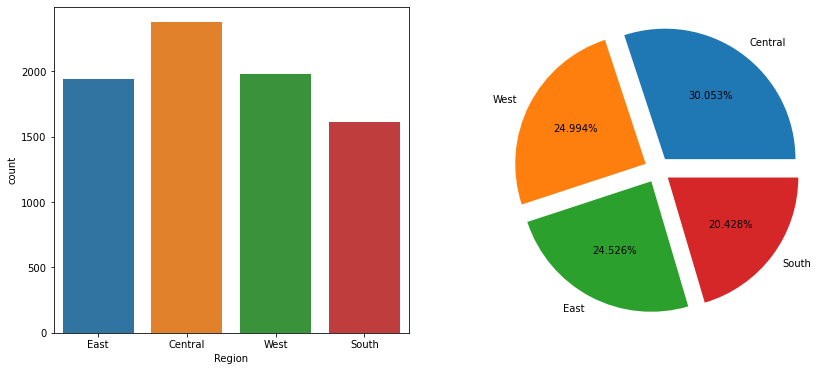

In [297]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.countplot(x='Region',data=dp, )

plt.subplot(1,2,2)
plt.pie(dp['Region'].value_counts(),labels = reg_percent.index,autopct='%.3f%%',explode = [0.1,0.1,0.1,0.1])
plt.show()

thus from the above graph we can conclude the sales of the used cars is highest in the Central region with a percent of 30.053% and least sales is in the South region with a percent of 20.428%.

In [298]:
dp.head()

name  year  selling_price  km_driven   Region  \
0        Maruti Swift Dzire VDI  2014         450000     145500     East   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000     East   
2      Honda City 2017-2020 EXi  2006         158000     140000  Central   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Central   
4        Maruti Swift VXI BSIII  2007         130000     120000     East   

      State or Province           City    fuel seller_type transmission  \
0  District of Columbia     Washington  Diesel  Individual       Manual   
1              New York  New York City  Diesel  Individual       Manual   
2              Illinois        Chicago  Petrol  Individual       Manual   
3              Illinois        Chicago  Diesel  Individual       Manual   
4              New York  New York City  Petrol  Individual       Manual   

          owner  mileage  engine  max_power  seats sold  present_year  \
0   First Owner    23.40  1248.0      74.00      5    Y          2023   
1  Second Owner    21.14  1498.0     103.52      5    Y          2023   
2   Third Owner    17.70  1497.0      78.00      5    Y          2023   
3   First Owner    23.00  1396.0      90.00      5    Y          2023   
4   First Owner    16.10  1298.0      88.20      5    Y          2023   

   total_years  
0            9  
1            9  
2           17  
3           13  
4           16

In [299]:
dp.groupby('name',as_index=False)['Region'].value_counts().sort_values('name',ascending =True)

name   Region  count
0        Ambassador CLASSIC 1500 DSL AC    South      1
1     Ambassador Classic 2000 DSZ AC PS    South      1
2       Ambassador Grand 1500 DSZ BSIII     West      1
3       Ambassador Grand 2000 DSZ PW CL  Central      1
4                Ashok Leyland Stile LE    South      1
...                                 ...      ...    ...
3832     Volvo XC40 D4 Inscription BSIV     West      6
3833             Volvo XC40 D4 R-Design  Central      1
3834             Volvo XC40 D4 R-Design     East      1
3835     Volvo XC60 Inscription D5 BSIV  Central      1
3836      Volvo XC90 T8 Excellence BSIV     East      1

[3837 rows x 3 columns]

In [300]:
dp1 = dp.groupby('Region',as_index=False)['selling_price'].sum().sort_values('selling_price',ascending =False)
dp1

Region  selling_price
0  Central     1515218334
3     West     1236573143
1     East     1221890402
2    South     1163745398

the highest selling price of the car is in the Central region and the lowest selling price of the car is in the South region.

In [301]:
dp1.value_counts(normalize=True).unstack()

selling_price  1163745398  1221890402  1236573143  1515218334
Region                                                       
Central               NaN         NaN         NaN        0.25
East                  NaN        0.25         NaN         NaN
South                0.25         NaN         NaN         NaN
West                  NaN         NaN        0.25         NaN

In [302]:
dp1.unstack()

Region         0       Central
               3          West
               1          East
               2         South
selling_price  0    1515218334
               3    1236573143
               1    1221890402
               2    1163745398
dtype: object

In [303]:
dp['transmission'].value_counts()

Manual       6865
Automatic    1041
Name: transmission, dtype: int64

here there are in total two types of transmission - manual and automatic. The number of manual transmissions are more than that of the automatic transmissions so the demand of manual transmissions is higher than that of the automatic transmissions.

In [304]:
dp.head()

name  year  selling_price  km_driven   Region  \
0        Maruti Swift Dzire VDI  2014         450000     145500     East   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000     East   
2      Honda City 2017-2020 EXi  2006         158000     140000  Central   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Central   
4        Maruti Swift VXI BSIII  2007         130000     120000     East   

      State or Province           City    fuel seller_type transmission  \
0  District of Columbia     Washington  Diesel  Individual       Manual   
1              New York  New York City  Diesel  Individual       Manual   
2              Illinois        Chicago  Petrol  Individual       Manual   
3              Illinois        Chicago  Diesel  Individual       Manual   
4              New York  New York City  Petrol  Individual       Manual   

          owner  mileage  engine  max_power  seats sold  present_year  \
0   First Owner    23.40  1248.0      74.00      5    Y          2023   
1  Second Owner    21.14  1498.0     103.52      5    Y          2023   
2   Third Owner    17.70  1497.0      78.00      5    Y          2023   
3   First Owner    23.00  1396.0      90.00      5    Y          2023   
4   First Owner    16.10  1298.0      88.20      5    Y          2023   

   total_years  
0            9  
1            9  
2           17  
3           13  
4           16

In [305]:
dp['seller_type'].empty

False

the column 'seller_type' doesn't have any empty value

In [306]:
dp['seller_type'].hasnans

False

the column 'seller_type' doesn't have any null value

In [307]:
dp['seller_type'].value_counts(dropna=True)

Individual          6563
Dealer              1107
Trustmark Dealer     236
Name: seller_type, dtype: int64

thus there are 3 different types of car sellers in our data set- Individual, Dealer, Trustmark Dealer

The individual type of sellers are the highest amongst all three and trustmark dealers are the lowest who sell the cars.

In [308]:
dp['fuel'].empty

False

the column named 'fuel' doesn't have any empty value

In [309]:
dp['fuel'].hasnans

False

the column named 'fuel' doesn't have any null value so we can proceed ahead

In [310]:
dp['fuel'].value_counts(normalize=True, ascending=False)

Diesel    0.543764
Petrol    0.445231
CNG       0.006577
LPG       0.004427
Name: fuel, dtype: float64

hence the cars who use the fuel type 'Diesel' are sold the most

In [311]:
plot = px.histogram(dp, x = "name",
                  color = "Region",
                  labels = {"Make":"All Brands"},
                  title = "Car brand vs Region")
                  
plot.show()

In [312]:
plt.figure(figsize=(8,8),facecolor='red',edgecolor='blue')

plot2 = px.histogram(dp, x = "name",
                  labels = {"Make":"All Brands"},
                  title = "Car brand",
                  color_discrete_sequence= ["blue"])
plot2.show()

<Figure size 576x576 with 0 Axes>

In [313]:
pd.crosstab(dp['name'],dp['State or Province'],margins=True).sum().sort_values(ascending=True)

State or Province
Wyoming                    24
Delaware                   30
Rhode Island               34
South Dakota               44
West Virginia              66
North Dakota               66
Montana                    76
Nevada                     78
New Hampshire              94
Vermont                   100
Kentucky                  110
Nebraska                  116
Connecticut               126
Mississippi               128
Louisiana                 132
District of Columbia      136
New Mexico                142
South Carolina            162
Idaho                     178
Oklahoma                  190
Alabama                   212
Arkansas                  214
Maine                     220
Kansas                    224
Arizona                   230
Wisconsin                 234
Iowa                      246
Oregon                    258
Utah                      266
Tennessee                 270
Missouri                  282
Maryland                  288
New Jersey            

In [314]:
plot3 = px.histogram(dp, x = "name",
                  color = "State or Province",
                  labels = {"Make":"All Brands"},
                  title = "Car brand vs State/Province")
                  
plot3.show()

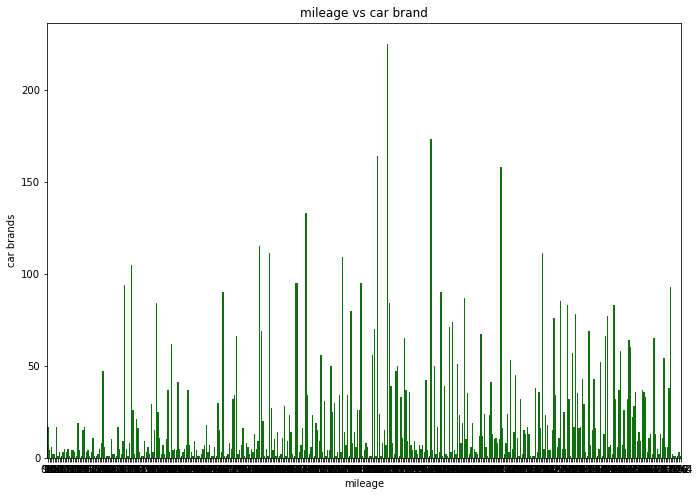

In [315]:
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
sns.countplot(x='mileage',data=dp, color='green')
plt.title('mileage vs car brand')
plt.ylabel('car brands')
              
plt.show()

In [316]:
plot5 = px.histogram(dp, x = "mileage",
                  color = "name",
                  labels = {"Make":"Car brands"},
                  title = "mileage vs car brands")
                  
plot5.show()

# Statistical Inferences-

In [317]:
dp.describe()

year  selling_price     km_driven      mileage       engine  \
count  7906.000000   7.906000e+03  7.906000e+03  7906.000000  7906.000000   
mean   2013.983936   6.498137e+05  6.918866e+04    19.419861  1458.708829   
std       3.863695   8.135827e+05  5.679230e+04     4.036263   503.893057   
min    1994.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2012.000000   2.700000e+05  3.500000e+04    16.780000  1197.000000   
50%    2015.000000   4.500000e+05  6.000000e+04    19.300000  1248.000000   
75%    2017.000000   6.900000e+05  9.542500e+04    22.320000  1582.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  present_year  total_years  
count  7906.000000  7906.000000        7906.0  7906.000000  
mean     91.587374     5.416393        2023.0     9.016064  
std      35.747216     0.959208           0.0     3.863695  
min      32.800000     2.000000        2023.0     3.000000  
25%      68.050000     5.000000        2023.0     6.000000  
50%      82.000000     5.000000        2023.0     8.000000  
75%     102.000000     5.000000        2023.0    11.000000  
max     400.000000    14.000000        2023.0    29.000000

thus from the above table we can conclude that average selling price of the car is very low, the max number of cars were sold in the year 2020, the minimum number of cars were sold in the year 1994, the maximum seats in a car are 14.

In [318]:
dp.describe().T

count           mean            std      min        25%  \
year           7906.0    2013.983936       3.863695   1994.0    2012.00   
selling_price  7906.0  649813.720845  813582.748354  29999.0  270000.00   
km_driven      7906.0   69188.659752   56792.296343      1.0   35000.00   
mileage        7906.0      19.419861       4.036263      0.0      16.78   
engine         7906.0    1458.708829     503.893057    624.0    1197.00   
max_power      7906.0      91.587374      35.747216     32.8      68.05   
seats          7906.0       5.416393       0.959208      2.0       5.00   
present_year   7906.0    2023.000000       0.000000   2023.0    2023.00   
total_years    7906.0       9.016064       3.863695      3.0       6.00   

                    50%        75%         max  
year             2015.0    2017.00      2020.0  
selling_price  450000.0  690000.00  10000000.0  
km_driven       60000.0   95425.00   2360457.0  
mileage            19.3      22.32        42.0  
engine           1248.0    1582.00      3604.0  
max_power          82.0     102.00       400.0  
seats               5.0       5.00        14.0  
present_year     2023.0    2023.00      2023.0  
total_years         8.0      11.00        29.0

the above function is the transpose of the 'describe' function where the rows are converted into columns and columns are converted into rows as shown above

Performing the t-test-
H0: mu_km driven is =35,000 km

H1: mu_km driven is !=35,000 km 

In [319]:
xbar = dp.km_driven.mean()
s= dp.km_driven.std()
mu = 35000
n_sample = len(dp.km_driven)
std_err= s/np.sqrt(n_sample)
t_stat = (xbar-mu)/std_err
t_stat

53.526771790732546

at 8% level of significance

In [320]:
alpha =0.08
dof = n_sample-1
t_crit = st.t.isf(alpha/2,dof)
t_crit

1.750911159187549

finding the p-value

In [321]:
p_value = st.t.cdf(t_stat,dof)*2
p_value

2.0

In [322]:
if p_value > alpha:
    print('fail to reject null hpyothesis')
else:
    print('reject Null Hypothesis')

fail to reject null hpyothesis


here since p_value (2.0) is greater than alpha(0.08) it means that it failed to reject the null hypothesis. Thus the total kilometers driven is 35000 km.

Effect of the categorical data on the sales-

Performing the Chi-square test-

In [323]:
trans=pd.crosstab(dp.transmission,dp.sold)
trans

sold             N     Y
transmission            
Automatic      755   286
Manual        5151  1714

In [324]:
st.chi2_contingency(trans)

(2.8736035402808486,
 0.09004305248583701,
 1,
 array([[ 777.65570453,  263.34429547],
        [5128.34429547, 1736.65570453]]))

In [325]:
st.chi2.isf(0.08,1)

3.064901720076361

Effect of Car sales due to one numerical and one categorical variable-

Taking the categorical variable as 'Fuel' here and numerical variable as 'Selling_price'

Whether the fuel type affects the selling price at 0.08 level of significance?

In [326]:
alpha = 0.08

In [327]:
diesel= dp[dp.fuel=="Diesel"]['selling_price']
petrol= dp[dp.fuel=='Petrol']['selling_price']
cng= dp[dp.fuel=='CNG']['selling_price']
lpg= dp[dp.fuel=='LPG']['selling_price']

In [328]:
diesel

0       450000
1       370000
3       225000
8       350000
9       200000
         ...  
7900    475000
7902    135000
7903    382000
7904    290000
7905    290000
Name: selling_price, Length: 4299, dtype: int64

Performing the 'Test of Normality' - 

In [329]:
st.shapiro(diesel)

ShapiroResult(statistic=0.5905802845954895, pvalue=0.0)

In [330]:
st.shapiro(petrol)

ShapiroResult(statistic=0.43488073348999023, pvalue=0.0)

In [331]:
st.shapiro(cng)

ShapiroResult(statistic=0.9634802341461182, pvalue=0.1107998862862587)

In [332]:
st.shapiro(lpg)

ShapiroResult(statistic=0.9675600528717041, pvalue=0.3798154294490814)

thus we can conclude that the p-value for 'CNG' and 'LPG' is greater than alpha(0.08) thus it failed to reject to reject the null hypothesis therefore we will now proceed with 'One-way Anova' test

H0: population of median selling price based on fuel type is same

H1: population of median selling price based on fuel type is not same

In [333]:
st.f_oneway(diesel,petrol,cng,lpg)

F_onewayResult(statistic=117.30554435257852, pvalue=2.52340474514499e-74)

here p-value is very smaller than alpha(0.08) thus it did not fail to reject the null hypothesis, it doesn't follow normal

In [334]:
dm = dp.mileage
dm

0       23.40
1       21.14
2       17.70
3       23.00
4       16.10
        ...  
7901    18.50
7902    16.80
7903    19.30
7904    23.57
7905    23.57
Name: mileage, Length: 7906, dtype: float64

In [335]:
st.shapiro(dm)

C:\Users\shivantripathi\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning:

p-value may not be accurate for N > 5000.



ShapiroResult(statistic=0.9891581535339355, pvalue=3.899982770575669e-24)

Since pvalue(3.899982770575669e-24)< alpha(0.05)we can say 'Reject to Hypothesis'

since it did not follow normal distribution so we will now go for the 'non-parametric test'

In [336]:
correlation = dp.corr()
correlation

year  selling_price  km_driven   mileage    engine  \
year           1.000000       0.412302  -0.428548  0.328544  0.018263   
selling_price  0.412302       1.000000  -0.222158 -0.126280  0.455682   
km_driven     -0.428548      -0.222158   1.000000 -0.172980  0.206031   
mileage        0.328544      -0.126280  -0.172980  1.000000 -0.576408   
engine         0.018263       0.455682   0.206031 -0.576408  1.000000   
max_power      0.226598       0.749674  -0.038159 -0.374621  0.703975   
seats         -0.007923       0.041617   0.227259 -0.451700  0.611103   
present_year        NaN            NaN        NaN       NaN       NaN   
total_years   -1.000000      -0.412302   0.428548 -0.328544 -0.018263   

               max_power     seats  present_year  total_years  
year            0.226598 -0.007923           NaN    -1.000000  
selling_price   0.749674  0.041617           NaN    -0.412302  
km_driven      -0.038159  0.227259           NaN     0.428548  
mileage        -0.374621 -0.451700           NaN    -0.328544  
engine          0.703975  0.611103           NaN    -0.018263  
max_power       1.000000  0.191999           NaN    -0.226598  
seats           0.191999  1.000000           NaN     0.007923  
present_year         NaN       NaN           NaN          NaN  
total_years    -0.226598  0.007923           NaN     1.000000

In [337]:
dp.drop('present_year', inplace=True, axis=1)

In [338]:
dp.head()

name  year  selling_price  km_driven   Region  \
0        Maruti Swift Dzire VDI  2014         450000     145500     East   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000     East   
2      Honda City 2017-2020 EXi  2006         158000     140000  Central   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Central   
4        Maruti Swift VXI BSIII  2007         130000     120000     East   

      State or Province           City    fuel seller_type transmission  \
0  District of Columbia     Washington  Diesel  Individual       Manual   
1              New York  New York City  Diesel  Individual       Manual   
2              Illinois        Chicago  Petrol  Individual       Manual   
3              Illinois        Chicago  Diesel  Individual       Manual   
4              New York  New York City  Petrol  Individual       Manual   

          owner  mileage  engine  max_power  seats sold  total_years  
0   First Owner    23.40  1248.0      74.00      5    Y            9  
1  Second Owner    21.14  1498.0     103.52      5    Y            9  
2   Third Owner    17.70  1497.0      78.00      5    Y           17  
3   First Owner    23.00  1396.0      90.00      5    Y           13  
4   First Owner    16.10  1298.0      88.20      5    Y           16

<AxesSubplot:>

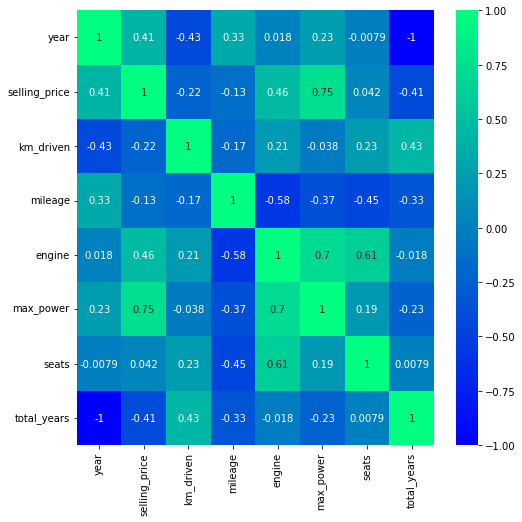

In [354]:
plt.figure(figsize=(8,8))
sns.heatmap(dp.corr(), annot = True, cmap = 'winter', annot_kws={'size': 10} , cbar=True)

From the above graph we can conclude that - 
* there is a posotive cor-relation between the Selling_price and the max_power

* there is a positive correlation between the km_driven and the engine

* there is a positive correlation between the km_driven & No_of_years

* there is a negative correlation between total numberof years a car is used and the mileage it covered

* there is a negative correlation between the km_driven and mileage

<Figure size 720x720 with 0 Axes>

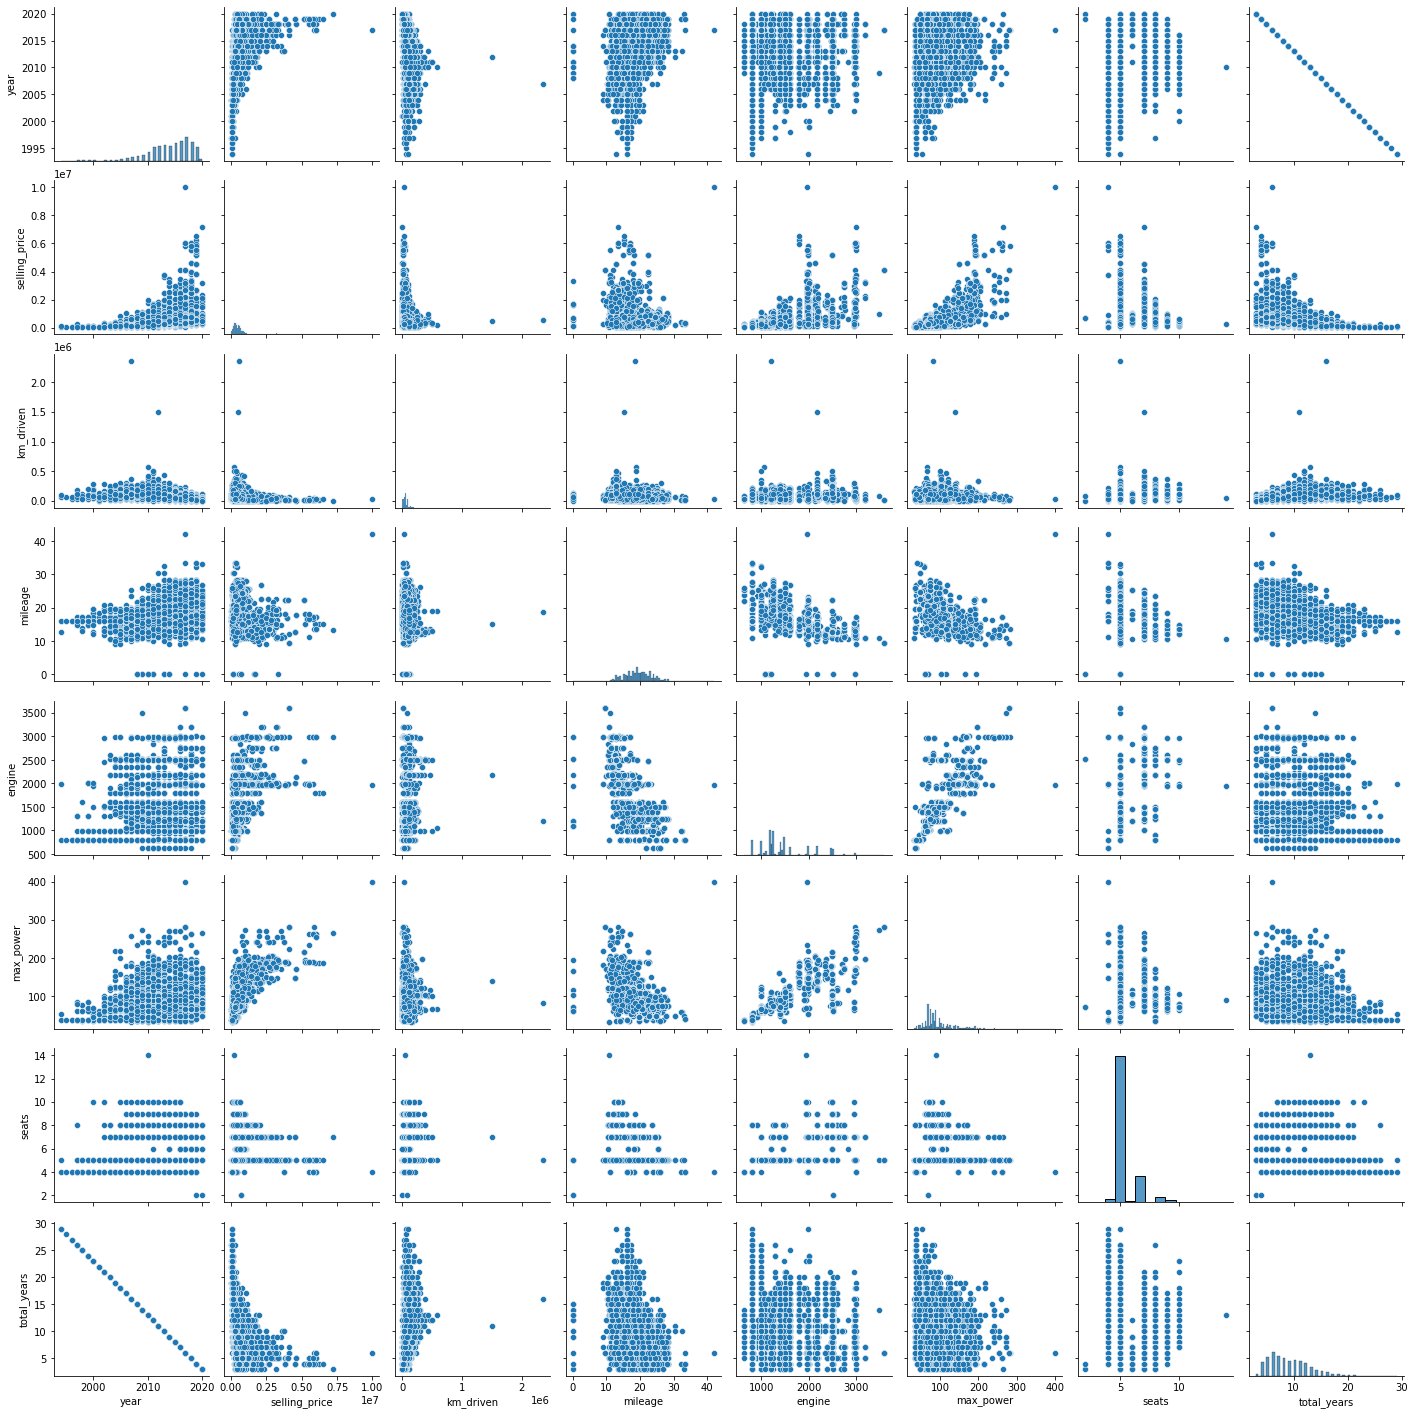

In [340]:
plt.figure(figsize=(10,10))

sns.pairplot(data=dp)

C:\Users\shivantripathi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Total no of years car is used')

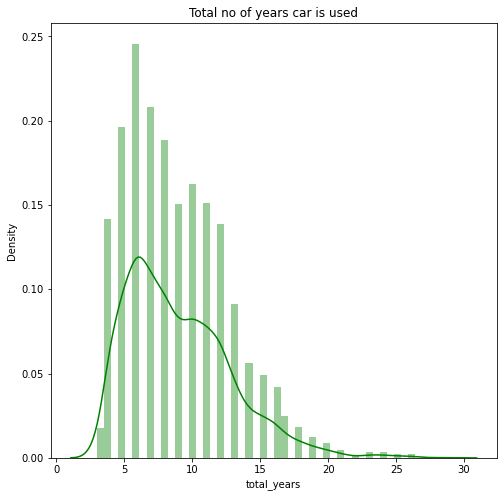

In [355]:
plt.figure(figsize=(8,8))
sns.distplot(dp['total_years'], color='green');
plt.title('Total no of years car is used')

thus from the above graph we can conclude that the graph is right-skewed which means that the mean is greater than the median and the car is used maximum between 5-10 years and the highest car used was for 6 years

C:\Users\shivantripathi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='selling_price'>

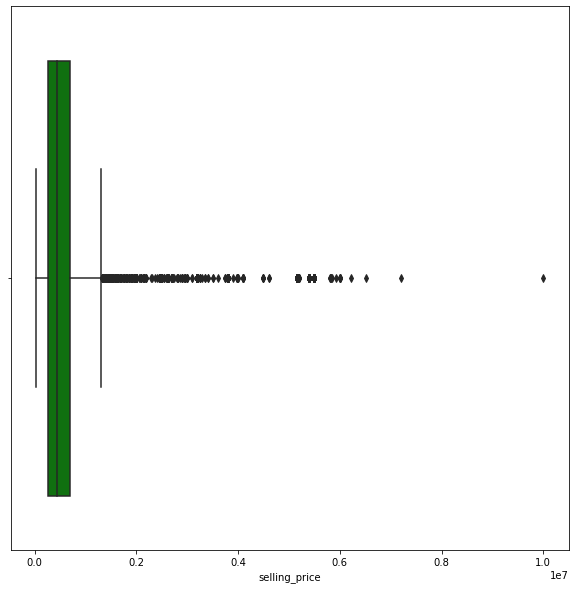

In [342]:
plt.figure(figsize=(10,10))
sns.boxplot(dp['selling_price'], color='green')

<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

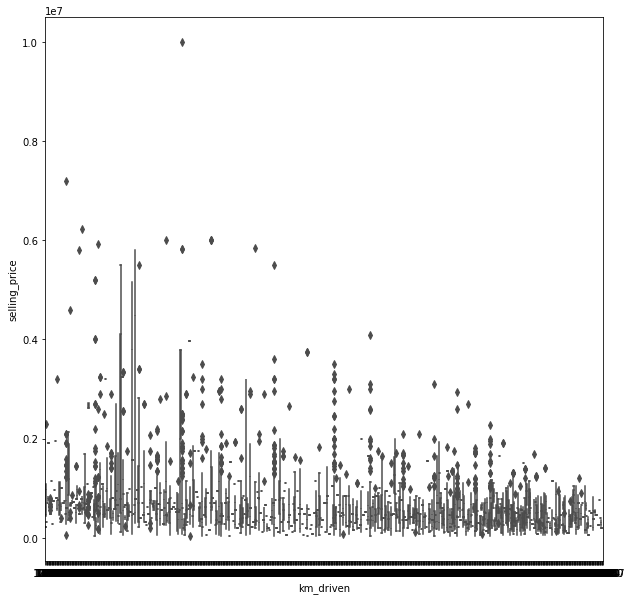

In [343]:
plt.figure(figsize=(10,10))
sns.boxplot(y= 'selling_price', x='km_driven',data=dp, color='red')

Inter-Quartile Range calculations-

In [344]:
dp_new=dp.copy()
IQR= dp_new['km_driven'].quantile(0.75)-dp_new['km_driven'].quantile(0.25)
upper = dp_new['km_driven'].quantile(0.75)+(1.5*IQR)
lower = dp_new['km_driven'].quantile(0.25)-(1.5*IQR)
dp_new[(dp_new['km_driven']> upper) | (dp_new['km_driven']<lower)]

name  year  selling_price  km_driven  \
262                 Maruti Swift Dzire ZDi  2012         320000     193000   
277         Mahindra Bolero DI DX 7 Seater  2007         210000     207890   
380   Toyota Innova 2.5 G1 Diesel 8-seater  2005         250000     240000   
382         Hyundai Verna XXi ABS (Petrol)  2009         340000     214000   
383                  Hyundai Verna CRDi SX  2009         340000     214000   
...                                    ...   ...            ...        ...   
7822            Maruti Gypsy King Soft Top  1997         300000     186388   
7850   Toyota Innova 2.5 V Diesel 7-seater  2010         425000     200000   
7856             Toyota Innova 2.5 E 7 STR  2009         550000     250000   
7874             Ford Figo Diesel Titanium  2012         260000     194000   
7898               Hyundai Santro Xing GLS  2008         120000     191000   

       Region     State or Province         City    fuel seller_type  \
262   Central              Michigan      Detroit  Diesel  Individual   
277      East  District of Columbia   Washington  Diesel  Individual   
380      West            Washington      Seattle  Diesel  Individual   
382   Central                 Texas       Dallas  Petrol  Individual   
383      West            California  Los Angeles  Diesel  Individual   
...       ...                   ...          ...     ...         ...   
7822     East                  Ohio         Lima  Petrol  Individual   
7850     West            New Mexico   Alamogordo  Diesel  Individual   
7856     West            New Mexico   Alamogordo  Diesel  Individual   
7874     West            California      Visalia  Diesel  Individual   
7898    South        North Carolina  Mooresville  Petrol  Individual   

     transmission         owner  mileage  engine  max_power  seats sold  \
262        Manual   First Owner    19.30  1248.0       73.9      5    Y   
277        Manual  Second Owner    13.60  2523.0       63.0      7    Y   
380        Manual   Third Owner    12.80  2494.0      102.0      8    Y   
382        Manual  Second Owner    13.90  1599.0      103.2      5    Y   
383        Manual  Second Owner    16.80  1493.0      110.0      5    Y   
...           ...           ...      ...     ...        ...    ...  ...   
7822       Manual  Second Owner    14.80  1298.0       80.0      8    N   
7850       Manual  Second Owner    12.80  2494.0      102.0      7    N   
7856       Manual   First Owner    12.80  2494.0      102.0      7    N   
7874       Manual   First Owner    20.00  1399.0       68.0      5    N   
7898       Manual   First Owner    17.92  1086.0       62.1      5    N   

      total_years  
262            11  
277            16  
380            18  
382            14  
383            14  
...           ...  
7822           26  
7850           13  
7856           14  
7874           11  
7898           15  

[194 rows x 17 columns]

In [345]:
dp_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 7905
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               7906 non-null   object 
 1   year               7906 non-null   int64  
 2   selling_price      7906 non-null   int64  
 3   km_driven          7906 non-null   int64  
 4   Region             7906 non-null   object 
 5   State or Province  7906 non-null   object 
 6   City               7906 non-null   object 
 7   fuel               7906 non-null   object 
 8   seller_type        7906 non-null   object 
 9   transmission       7906 non-null   object 
 10  owner              7906 non-null   object 
 11  mileage            7906 non-null   float64
 12  engine             7906 non-null   float64
 13  max_power          7906 non-null   float64
 14  seats              7906 non-null   int64  
 15  sold               7906 non-null   object 
 16  total_years        7906 

In [346]:
dp_new.shape

(7906, 17)

In [347]:
dp_new.shape[0]

7906

In [348]:
dp_new=dp.copy()
IQR= dp_new['selling_price'].quantile(0.75)-dp_new['selling_price'].quantile(0.25)
upper = dp_new['selling_price'].quantile(0.75)+(1.5*IQR)
lower = dp_new['selling_price'].quantile(0.25)-(1.5*IQR)
dp_new[(dp['selling_price']> upper) | (dp['selling_price']<lower)].shape[0]

598

hence we can conclude that out of 7906 there are in total 598 outliers in case of the selling_price in our dataset

# Conversion of the categorical data into the numerical data for the understanding of machine learning (Label Encoding)

In [349]:
dp5 = dp.copy()
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler,LabelEncoder

In [350]:
lab=LabelEncoder()

In [351]:
dp5.head()

name  year  selling_price  km_driven   Region  \
0        Maruti Swift Dzire VDI  2014         450000     145500     East   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000     East   
2      Honda City 2017-2020 EXi  2006         158000     140000  Central   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Central   
4        Maruti Swift VXI BSIII  2007         130000     120000     East   

      State or Province           City    fuel seller_type transmission  \
0  District of Columbia     Washington  Diesel  Individual       Manual   
1              New York  New York City  Diesel  Individual       Manual   
2              Illinois        Chicago  Petrol  Individual       Manual   
3              Illinois        Chicago  Diesel  Individual       Manual   
4              New York  New York City  Petrol  Individual       Manual   

          owner  mileage  engine  max_power  seats sold  total_years  
0   First Owner    23.40  1248.0      74.00      5    Y            9  
1  Second Owner    21.14  1498.0     103.52      5    Y            9  
2   Third Owner    17.70  1497.0      78.00      5    Y           17  
3   First Owner    23.00  1396.0      90.00      5    Y           13  
4   First Owner    16.10  1298.0      88.20      5    Y           16

In [352]:
dp5['name']=lab.fit_transform(dp5['name'])
dp5['Region']=lab.fit_transform(dp5['Region'])
dp5['State or Province']=lab.fit_transform(dp5['State or Province'])
dp5['City']=lab.fit_transform(dp5['City'])
dp5['fuel']=lab.fit_transform(dp5['fuel'])
dp5['seller_type']=lab.fit_transform(dp5['seller_type'])
dp5['transmission']=lab.fit_transform(dp5['transmission'])
dp5['owner']=lab.fit_transform(dp5['owner'])
dp5['sold']=lab.fit_transform(dp5['sold'])

In [353]:
dp5.head(6)

name  year  selling_price  km_driven  Region  State or Province  City  \
0  1249  2014         450000     145500       1                  7  1223   
1  1546  2014         370000     120000       1                 30   786   
2   375  2006         158000     140000       0                 11   193   
3   743  2010         225000     127000       0                 11   193   
4  1290  2007         130000     120000       1                 30   786   
5   655  2017         440000      45000       1                 30   786   

   fuel  seller_type  transmission  owner  mileage  engine  max_power  seats  \
0     1            1             1      0    23.40  1248.0      74.00      5   
1     1            1             1      2    21.14  1498.0     103.52      5   
2     3            1             1      4    17.70  1497.0      78.00      5   
3     1            1             1      0    23.00  1396.0      90.00      5   
4     3            1             1      0    16.10  1298.0      88.20      5   
5     3            1             1      0    20.14  1197.0      81.86      5   

   sold  total_years  
0     1            9  
1     1            9  
2     1           17  
3     1           13  
4     1           16  
5     1            6

thus we can see that all the columns that are categorical in nature are converted into the numerical form for the machine to understand the type of data which is now in the numerical form

# ******** End of Project*********